# Dataset Description (Loan Prediction Dataset)
Bu proje, konut kredisi başvurularının onaylanıp onaylanmayacağını tahmin etmeye yönelik hazırlanmış Loan Prediction veri setini kullanmaktadır. Veri seti, başvuru yapan bireylere ait demografik bilgiler, gelir düzeyi, kredi tutarı ve başvuru süreciyle ilgili çeşitli özellikler içermektedir. Ayrıca her başvuru için sonuç niteliğindeki Loan_Status değişkeni bulunmaktadır.

Dataset binary classification problemidir ve amaç, verilen müşteri bilgilerinden hareketle kredi başvurusunun “Y” (approved) veya “N” (not approved) şeklinde sonuçlanacağını tahmin etmektir.

Veri setinde yer alan temel değişken grupları:

* Applicant Information: Gender, Married, Dependents, Education, Self_Employed

* Financial Information: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History

* Property and Location Factors: Property_Area

* Target Variable: Loan_Status (Y/N)

Bu değişkenler, hem başvuru sahibinin sosyal/demografik durumunu hem de finansal yeterliliğini temsil eder.
Bu nedenle veri seti, kredi riski modelleme, sınıflandırma algoritmalarının karşılaştırılması, veri temizleme ve feature engineering uygulamaları için oldukça uygun bir örnek teşkil etmektedir.

Veri, Kaggle üzerinde “Loan Prediction Problem Dataset” adıyla yayımlanmıştır ve eğitim (train) ile test setlerinden oluşmaktadır.

# 01 - Exploratory Data Analysis (EDA)

Bu notebook, veri seti üzerinde Keşifçi Veri Analizi (EDA) işlemlerini içerir. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams["font.size"] = 10

### VERİ SETİ YÜKLEME

In [2]:
data = pd.read_csv('../data/raw/train_u6lujuX_CVtuZ9i.csv')

### VERİ SETİ HAKKINDA GENEL BİLGİLER

In [3]:
print(data.head())
print("\nShape:", data.shape)   

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [4]:
print("=== VERİ SETİ HAKKINDA GENEL BİLGİLER ===")
print(data.info())

=== VERİ SETİ HAKKINDA GENEL BİLGİLER ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [5]:
df_summary = pd.DataFrame({
    'Sütun Adı': data.columns,
    'Veri Tipi': data.dtypes.values,
    'Benzersiz Değer Sayısı': data.nunique().values,
    'Eksik Değer Sayısı': data.isnull().sum().values
})

print("\n=== SÜTUN İSİMLERİ - VERİ TİPLERİ - BENZERSİZ DEĞER SAYILARI - EKSİK DEĞER SAYILARI ===")
display(df_summary)



=== SÜTUN İSİMLERİ - VERİ TİPLERİ - BENZERSİZ DEĞER SAYILARI - EKSİK DEĞER SAYILARI ===


,Sütun Adı,Veri Tipi,Benzersiz Değer Sayısı,Eksik Değer Sayısı
0,Loan_ID,object,614,0
1,Gender,object,2,13
2,Married,object,2,3
3,Dependents,object,4,15
4,Education,object,2,0
5,Self_Employed,object,2,32
6,ApplicantIncome,int64,505,0
7,CoapplicantIncome,float64,287,0
8,LoanAmount,float64,203,22
9,Loan_Amount_Term,float64,10,14


In [6]:
# Sayısal özelliklerin istatistiksel özeti
print("\n=== SAYISAL ÖZELLİKLERİN İSTATİSTİKSEL ÖZETİ ===")
data.describe()


=== SAYISAL ÖZELLİKLERİN İSTATİSTİKSEL ÖZETİ ===


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Kategorik özelliklerin istatistiksel özeti
print("\n=== KATEGORİK ÖZELLİKLERİN İSTATİSTİKSEL ÖZETİ ===")
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols].describe()


=== KATEGORİK ÖZELLİKLERİN İSTATİSTİKSEL ÖZETİ ===


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


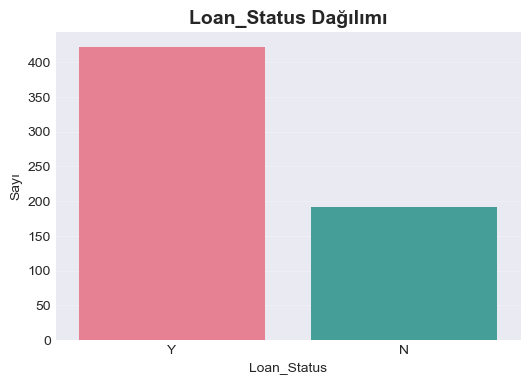


=== Loan_Status Oranları (%) ===
Loan_Status
Y    68.73
N    31.27
Name: proportion, dtype: float64


In [8]:
# TARGET DAĞILIMI & DENGESİZLİK ANALİZİ 
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Loan_Status', palette='husl')
plt.title("Loan_Status Dağılımı", fontsize=14, fontweight="bold")
plt.ylabel("Sayı")
plt.xlabel("Loan_Status")
plt.grid(axis='y', alpha=0.2)
plt.show()

# Oransal dağılım
print("\n=== Loan_Status Oranları (%) ===")
print(data['Loan_Status'].value_counts(normalize=True).mul(100).round(2))


### KATEGORİK DEĞİŞKENLERİN TARGET (Loan_Status) İLE İLİŞKİSİ

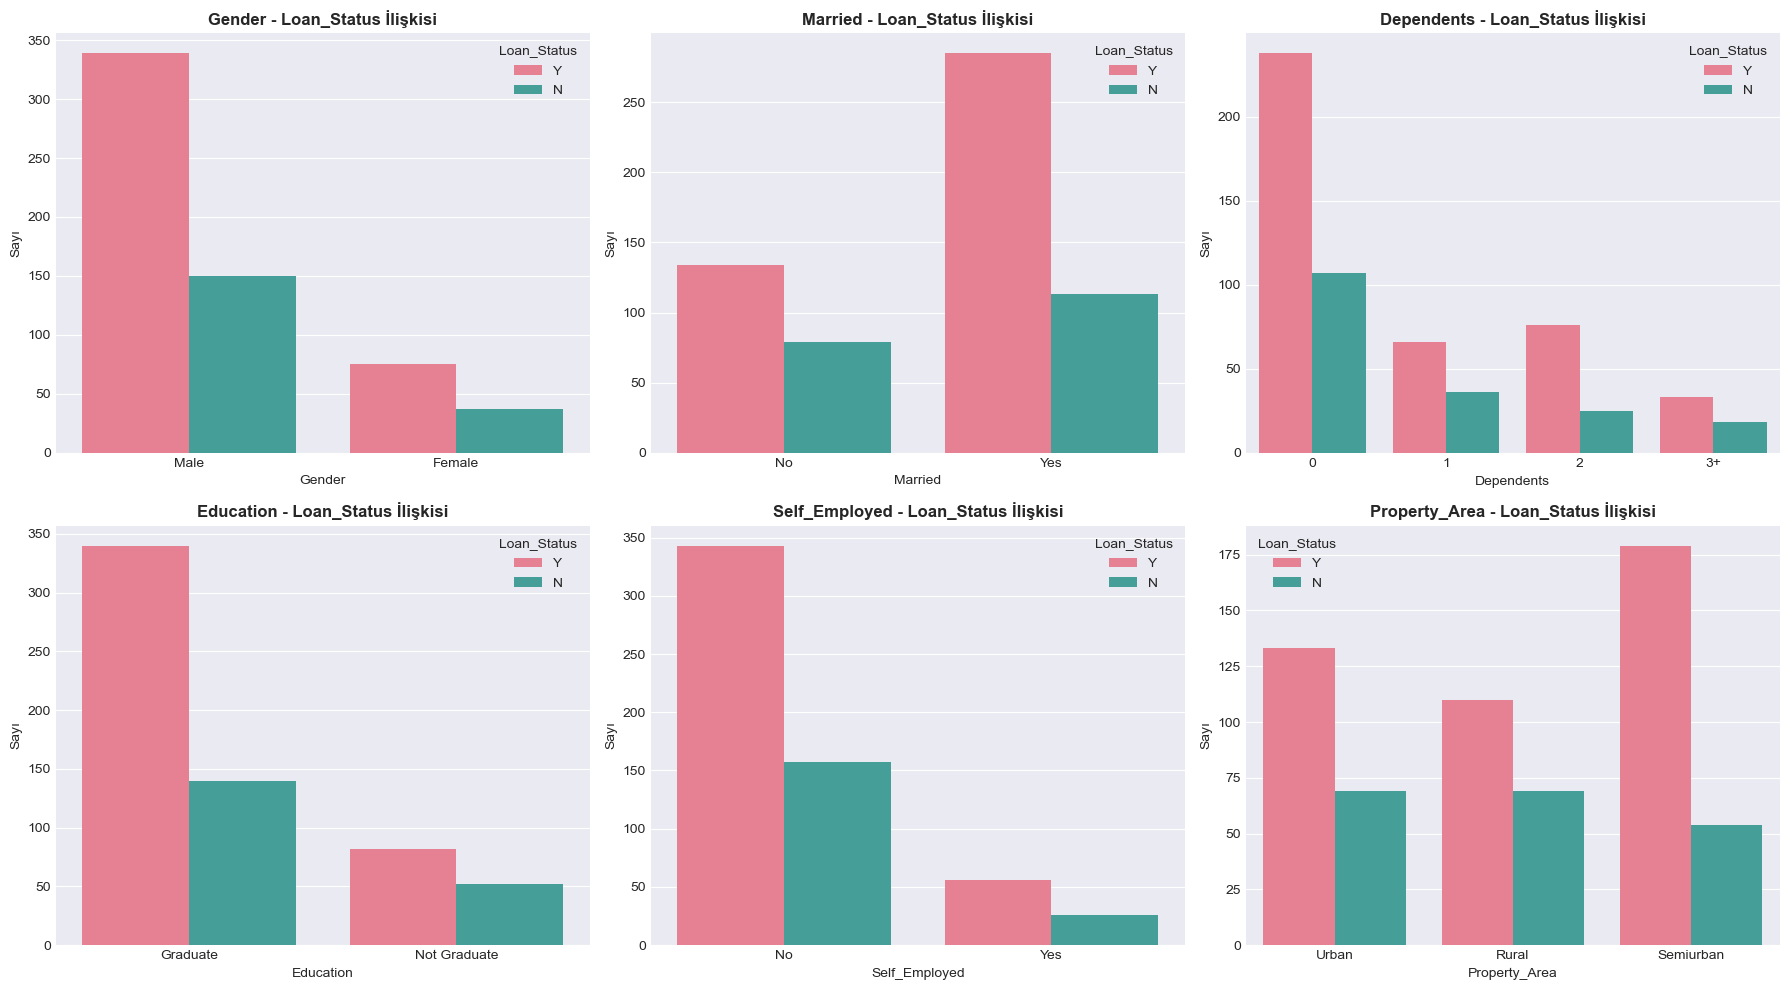

In [9]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education',
            'Self_Employed', 'Property_Area']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=data, x=col, hue='Loan_Status', palette='husl', ax=axes[i])
    axes[i].set_title(f'{col} - Loan_Status İlişkisi', fontsize=12, fontweight="bold")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Sayı')
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].legend(title='Loan_Status')

plt.tight_layout()
plt.show()

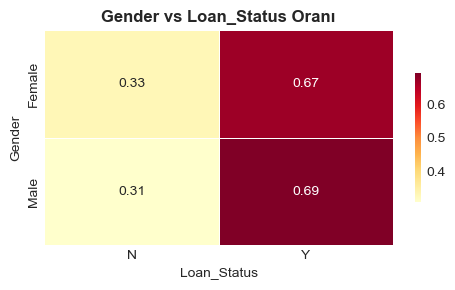

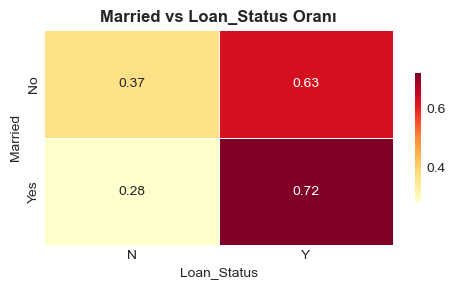

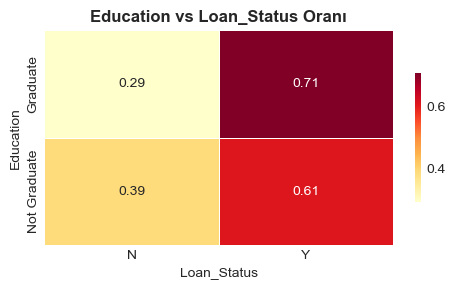

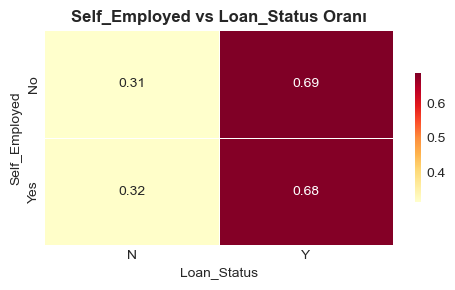

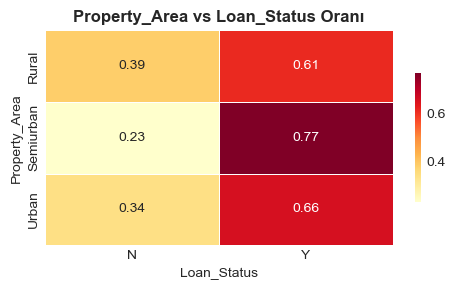

In [10]:
# KATEGORİK DEĞİŞKENLER vs Loan_Status (Heatmap Analizi)
cat_features = ["Gender", "Married", "Education", "Self_Employed", "Property_Area"]

for col in cat_features:
    pivot = pd.crosstab(data[col], data['Loan_Status'], normalize='index')

    plt.figure(figsize=(5,3))
    sns.heatmap(
        pivot, annot=True, cmap="YlOrRd", fmt=".2f",
        cbar_kws={"shrink": 0.6}, linewidths=0.5
    )

    plt.title(f"{col} vs Loan_Status Oranı", fontsize=12, fontweight='bold')
    plt.xlabel("Loan_Status")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()



### SAYISAL DEĞİŞKENLERİN TARGET İLE İLİŞKİSİ (BOXPLOT)

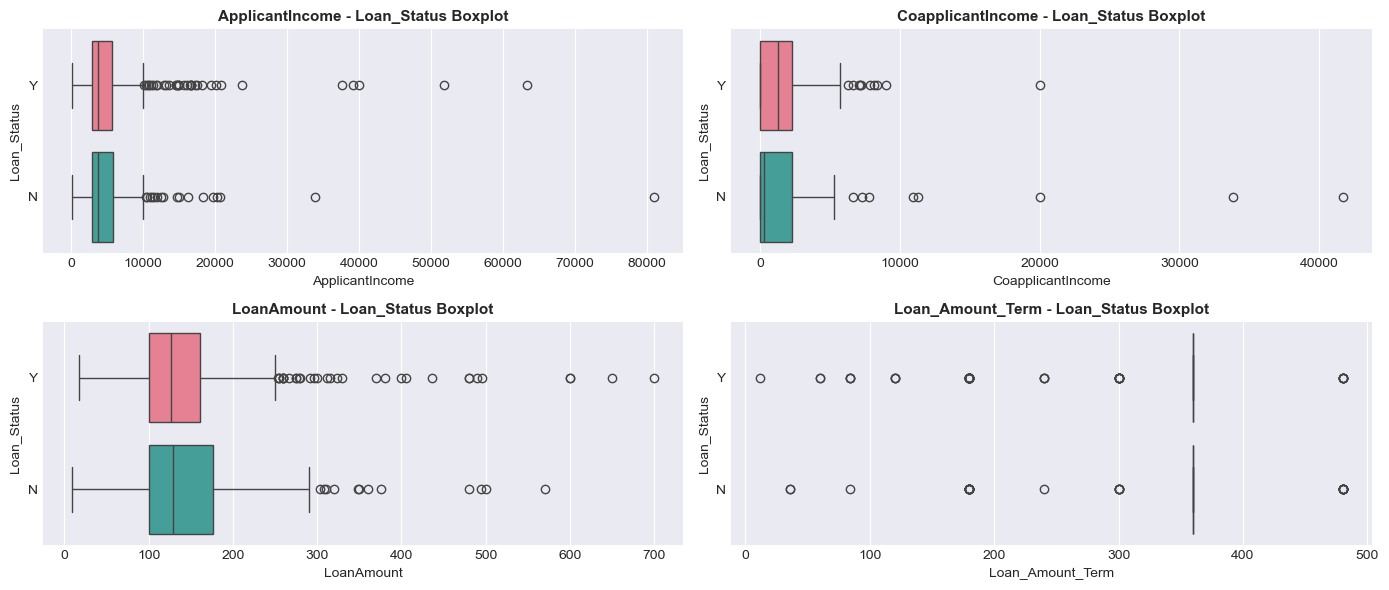

In [11]:
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

fig, axes = plt.subplots(2, 2, figsize=(14, 6))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(
        data=data,
        x=col,
        y='Loan_Status',
        palette='husl',
        ax=axes[i],
        orient='h'
    )
    axes[i].set_title(f'{col} - Loan_Status Boxplot', fontsize=11, fontweight="bold")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Loan_Status')

plt.tight_layout()
plt.show()

### SAYISAL DEĞİŞKEN DAĞILIMLARI (HISTOGRAMS)

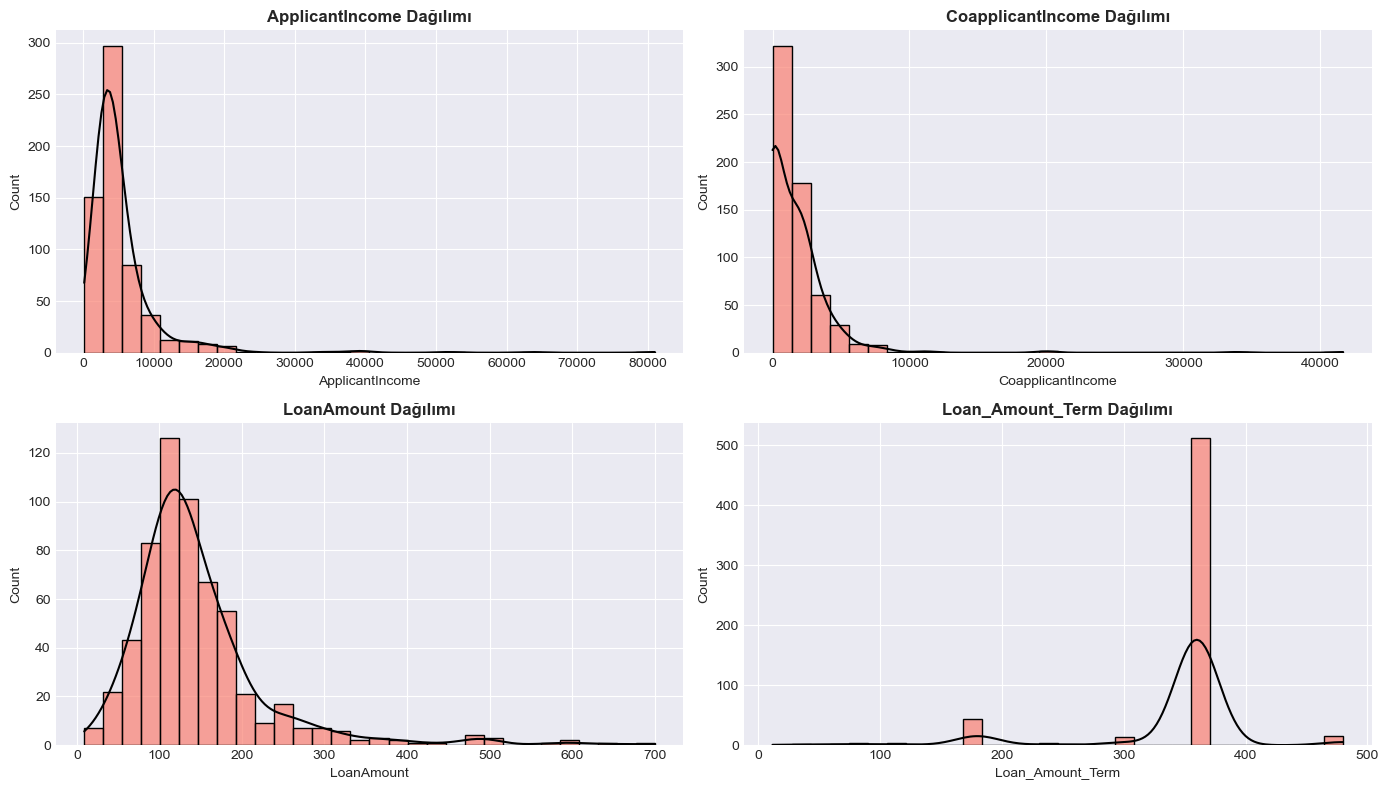

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(
        data[col],
        kde=True,
        bins=30,
        ax=axes[i],
        color='salmon',
        edgecolor='black',
        alpha=0.7
    )
    axes[i].set_title(f'{col} Dağılımı', fontsize=12, fontweight="bold")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].lines[0].set_color('black')
    axes[i].lines[0].set_linewidth(1.5)

plt.tight_layout()
plt.show()

### KORELASYON MATRİSİ

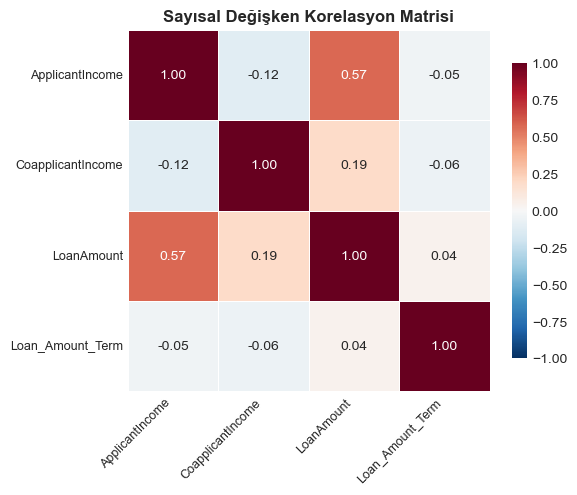

In [13]:
corr = data[num_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    vmin=-1, vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title('Sayısal Değişken Korelasyon Matrisi', fontsize=12, fontweight="bold")
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()


### EKSİK VERİ ANALİZİ

In [14]:
missing_data = pd.DataFrame({
    'Eksik Değer Sayısı': data.isnull().sum(),
    'Eksik Değer Yüzdesi (%)': (data.isnull().sum() / len(data)) * 100
})

# Sadece eksik veri bulunan değişkenler
missing_data = missing_data[missing_data['Eksik Değer Sayısı'] > 0]\
                    .sort_values(by='Eksik Değer Sayısı', ascending=False)

print(missing_data)

                  Eksik Değer Sayısı  Eksik Değer Yüzdesi (%)
Credit_History                    50                 8.143322
Self_Employed                     32                 5.211726
LoanAmount                        22                 3.583062
Dependents                        15                 2.442997
Loan_Amount_Term                  14                 2.280130
Gender                            13                 2.117264
Married                            3                 0.488599


### Eksik Veri Görselleştirme

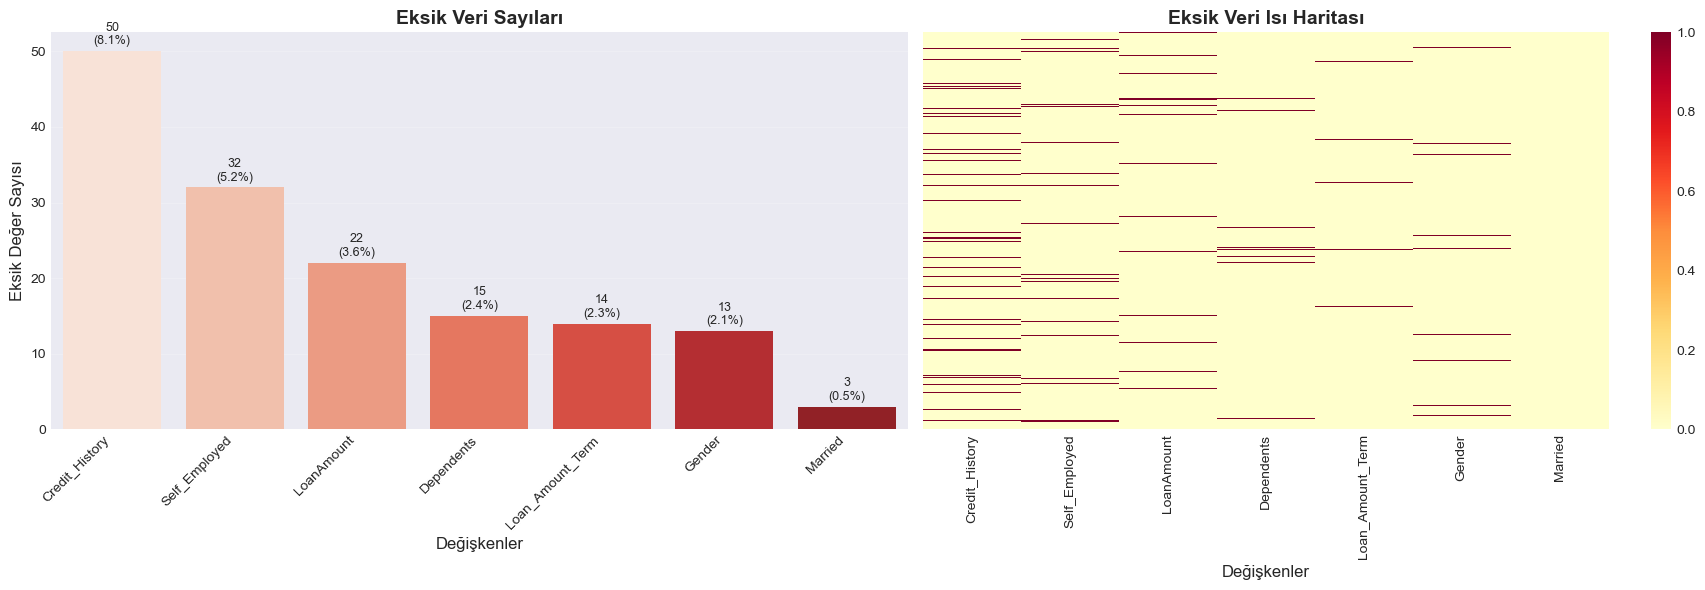

In [15]:
# index'i kolona çevir (barplot için)
missing_plot = missing_data.reset_index().rename(columns={'index': 'Değişken'})

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 1) Eksik Veri Barplot
sns.barplot(
    data=missing_plot,
    x='Değişken',
    y='Eksik Değer Sayısı',
    ax=axes[0],
    palette='Reds'
)

axes[0].set_title("Eksik Veri Sayıları", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Değişkenler", fontsize=12)
axes[0].set_ylabel("Eksik Değer Sayısı", fontsize=12)
axes[0].grid(axis="y", alpha=0.2)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")

# Bar anotasyonları
for i, row in missing_plot.iterrows():
    count = int(row["Eksik Değer Sayısı"])
    pct = row["Eksik Değer Yüzdesi (%)"]
    axes[0].text(
        i, count + 0.5,
        f"{count}\n({pct:.1f}%)",
        ha="center", va="bottom", fontsize=9
    )
# 2) Eksik Veri Heatmap
sns.heatmap(
    data[missing_data.index].isnull(),
    cmap="YlOrRd",
    cbar=True,
    ax=axes[1],
    yticklabels=False
)

axes[1].set_title("Eksik Veri Isı Haritası", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Değişkenler", fontsize=12)

plt.tight_layout()
plt.show()

###  Eksik Veri Korelasyonu

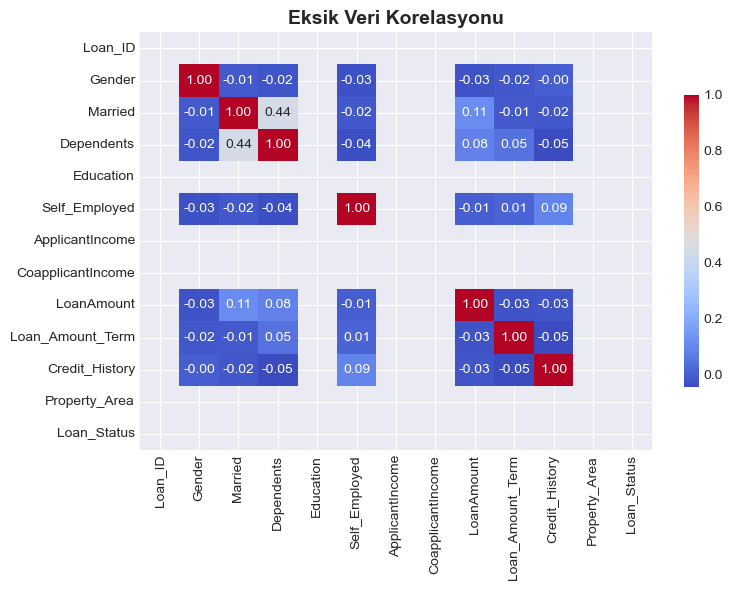

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    data.isnull().corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar_kws={"shrink": 0.7}
)

plt.title('Eksik Veri Korelasyonu', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [17]:
# AYKIRI DEĞER (OUTLIER) ANALİZİ (IQR Yöntemi)
print("\n=== SAYISAL DEĞİŞKENLERDE AYKIRI DEĞER TESPİTİ ===")

def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[c], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[c], 75)
        # IQR
        IQR = Q3 - Q1

        # Outlier step
        outlier_step = 1.5 * IQR

        # Outlier indexlerini belirle
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        
        num_outliers = len(outlier_list_col)
        if num_outliers > 0:
            print(f"{c} : {num_outliers} adet aykırı değer bulundu.")
            print(f"   Alt Sınır: {Q1 - outlier_step:.2f}, Üst Sınır: {Q3 + outlier_step:.2f}\n")
        
    return outlier_indices

# Boxplot çizdirdiğin num_cols listesini kullanıyoruz
detect_outliers(data, num_cols)


=== SAYISAL DEĞİŞKENLERDE AYKIRI DEĞER TESPİTİ ===
ApplicantIncome : 50 adet aykırı değer bulundu.
   Alt Sınır: -1498.75, Üst Sınır: 10171.25

CoapplicantIncome : 18 adet aykırı değer bulundu.
   Alt Sınır: -3445.88, Üst Sınır: 5743.12



[]

In [18]:
# MÜKERRER KAYIT KONTROLÜ
duplicates = data.duplicated().sum()
print(f"\nVeri setindeki mükerrer (duplicate) kayıt sayısı: {duplicates}")

if duplicates > 0:
    print("Mükerrer kayıtlar tespit edildi. Preprocessing aşamasında silinmesi önerilir.")
else:
    print("Mükerrer kayıt bulunmamaktadır.")


Veri setindeki mükerrer (duplicate) kayıt sayısı: 0
Mükerrer kayıt bulunmamaktadır.
